# Firefighter Fatalities Investigation

This Jupyter Notebook investigates firefighter fatalities from a public dataset provided by the Federal Emergency Management Agency (FEMA). The U.S. Fire Administration tracks and collects information on the causes of on-duty firefighter fatalities that occur in the United States. This dataset contains this collected data which is hosted on the FEMA website. Below is the current link for this dataset as of 09/18/2020.

Link: https://apps.usfa.fema.gov/firefighter-fatalities/

## Motivation For Investigation

My personal motivation for investigating this dataset is because I want to, in the near future, become a volunteer firefighter myself. I find firefighting to be such a rewarding way to give back to the community around me and hope to become a part of this community someday. Thus, I think it would be useful to have some background knowledge regarding firefighting prior to enrolling as a volunteer firefighter. This dataset provides me one way to do this by becoming better equiped to knowing the analysis of firefighters deaths with the hope that one day this knowledge could help prevent a future firefighter death whether it be a fellow firefighter or myself.

## Introductory Analysis

Below analysis on the dataset starts by importing the needed python libraries and dataset into this Jupyter Notebook. This provides a fire glance into the what the dataset contains.

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from fastai.tabular.all import *

%matplotlib inline

In [232]:
df = pd.read_csv('ff_data_2021.csv')
df_origianl = df.copy()

In [233]:
df.head()

,Initial summary,First name,Last name,Middle name,Age,Rank,Classification,Incident date,Date of death,Cause of death,Nature of death,Activity,Emergency,Duty,Property type,Memorial fund info
0,"Firefighter Pollard was driving a rescue vehicle to a wildland fire. While enroute, he collapsed and was treated by first responders and then airlifted to a hospital. Firefighter Pollard died the next day on January 1, 2000. Firefighter Pollard died of a cerebral bleed (stroke/CVA).\r\n\r\n",Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,"Pump Operator/Inspector Purdy was operating a top-mounted pump panel at the scene of a residential structure fire. Pump Operator/Inspector Purdy asked his wife, a volunteer paramedic, for a drink. When she returned to the truck with the drink, she saw him fall from the truck, the victim of a massive heart attack. Medical aid was provided immediately. Pump Operator/Inspector Purdy was transported to a local hospital where he was pronounced dead 20 minutes after his arrival. No autopsy was performed.\r\n\r\n",Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN
2,"First Assistant Chief Osadacz was on the scene of a vehicle fire that resulted from the collision of a pickup truck with a tree. While working on the scene, First Assistant Chief Osadacz was struck in the groin area by a water stream from a 1� -inch hoseline. First Assistant Chief Osadacz was agitated by this occurrence, left the scene, and returned to his home. Upon his arrival at home, First Assistant Chief Osadacz complained of indigestion, took some over-the-counter medicine, and laid down to rest. Within a few moments, First Assistant Chief Osadacz was struck with a fatal heart at...",Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN
3,"Firefighter Streeter responded to a trash and grass fire in the department�s brush truck. Shortly after exiting the vehicle, Firefighter Streeter collapsed of an apparent heart attack. CPR was administered immediately by other firefighters, and an ambulance was summoned. Firefighter Streeter was a charter member of the Ranch Drive Volunteer Fire Department.\r\n\r\n",Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
4,"Firefighter Bankert was participating in fire department sponsored dive training in a rock quarry that contains a private lake used exclusively for recreational diving. Firefighter Bankert was a member of his department�s search and recovery dive team. As the class ascended from the third of three dives, the class stopped for a safety and accountability check at a depth of 15 feet. At the time of the check, Firefighter Bankert was present; however, when the class proceeded to the surface, Firefighter Bankert did not surface. Other divers went immediately to the bottom of the lake and f...",Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


### Data Cleaning

Several steps are taken below to clean the data of unnecessary columns or missing data.

In [234]:
# Drop the Initial Summary Column for now since it full of supplimentary and not needed information regarding the incident.
df = df.drop(columns=['Initial summary'])

columns = list(df.columns)
fixed_cols = []

# Format the column names to be lowercase and have a underscore instead of spaces
for col in columns:
    col = col.lower()
    col = col.replace(' ', '_')
    fixed_cols.append(col)

df.columns = fixed_cols
df.head()

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
0,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN
2,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN
3,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
4,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


In [235]:
# Convert the dates to datetime for easy manipulation
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

In [236]:
# Visually show how many unique values are inside each column
df.nunique()

first_name             546
last_name             1948
middle_name            535
age                     75
rank                   290
classification           8
incident_date         1629
date_of_death         1639
cause_of_death          13
nature_of_death         12
activity                23
emergency                2
duty                     7
property_type           11
memorial_fund_info     589
dtype: int64

In [237]:
# Test to see if we have any null / missing values within the dataset
df.isnull().values.any()

True

In [238]:
# Sum up these null values for each column of the dataset
df.isnull().sum()

first_name               0
last_name                0
middle_name            211
age                    360
rank                     7
classification           3
incident_date            1
date_of_death            0
cause_of_death          13
nature_of_death          7
activity                17
emergency                0
duty                     6
property_type          307
memorial_fund_info    1568
dtype: int64

In [239]:
# Fill na values with unknown
df['age'].fillna(-99, inplace=True)
df['rank'].fillna('unknown', inplace=True)
df['classification'].fillna('unknown', inplace=True)
df['cause_of_death'].fillna('unknown', inplace=True)
df['activity'].fillna('Unknown', inplace=True)
df['property_type'].fillna('unknown', inplace=True)

# Fill the one na value with an estimate based off of the notes in the data
df['incident_date'].fillna(pd.Timestamp('2003-02-03'), inplace=True)

#### Rank

Doing a quick value counts shows over 287 "unique" ranks. Let's try to conslidate a few of these categories best we can by combining some ranks together.

In [240]:
value_count_ranks = df['rank'].value_counts()
value_count_ranks[:30]

Firefighter                 1025
Lieutenant                   205
Captain                      201
Fire Chief                   120
Firefighter/Paramedic         40
Assistant Chief               40
Assistant Fire Chief          40
Battalion Chief               37
Firefighter/EMT               34
Chief                         31
Pilot                         29
Engineer                      22
Fire Police Captain           20
Deputy Chief                  18
Fire Police Officer           16
Fire Captain                  13
Inmate Firefighter            12
Firefighter-EMT               10
Deputy Fire Chief              9
Fire Marshal                   8
Fire Police Lieutenant         8
Firefighter II                 8
Probationary Firefighter       8
Fire Engineer                  8
unknown                        7
Firefighter 1st Grade          6
Fire Apparatus Operator        6
Safety Officer                 6
Senior Firefighter             5
Private                        5
Name: rank

In [241]:
value_count_ranks[-50:]

Pump Operator/Paramedic                  1
Senior Firefighter/Driver Engineer       1
Helitack Superintendent                  1
Co-pilot                                 1
Firefighter/Helitack Crewmember          1
Senior Firefighter/Engineer/Paramedic    1
Vice President                           1
Firefighter/EMT EMS Captain              1
Major/Navigator                          1
Firefighter - Technician One             1
Assistant Fire Engine Operator           1
Fire Police Captain/Chaplain             1
Dozer Operator                           1
Firefighter & Dept. President            1
Fire Coordinator                         1
First Captain                            1
Firefighter/Trustee                      1
Fire Police Officer/Fire Commisioner     1
Fire Equipment Operator                  1
Firefighter - Chief Driver               1
SEAT Pilot                               1
Firefighter Cadet                        1
Acting Fire Chief                        1
Fire Police

In [244]:
# TO-DO
# fix iteration over rank's to perform calculation

unique_ranks_prior = len(df['rank'].value_counts())
print(f'There are {unique_ranks_prior} unique ranks in the dataset prior to combining groups.')

# Switch strings function
def switch_str(x):
    x = x.split('/')[:]
    RANK_1 = x[1]
    RANK_2 = x[0]
    x = '/'.join([RANK_1, RANK_2])
    return x, RANK_1, RANK_2

# Pandas implementation
df['rank'] = df['rank'].str.lower()
df['rank'] = df['rank'].replace(' / ', '/')
df['rank'] = df['rank'].replace(' /', '/')
df['rank'] = df['rank'].replace('/ ', '/')
df['rank'] = df['rank'].replace(' - ', '-')
df['rank'] = df['rank'].replace(' -', '-')
df['rank'] = df['rank'].replace('- ', '-')
df['rank'] = df['rank'].replace('-', '/')
df['rank'] = df['rank'].replace('2', 'ii')
df['rank'] = df['rank'].replace('3', 'iii')
df['rank'] = df['rank'].replace('firefigher', 'firefighter')
df['rank'] = df['rank'].replace('(contract)', '')
df['rank'] = df['rank'].replace('  ', '')
df['rank'] = df['rank'].replace('acting ', '')
df['rank'] = df['rank'].replace('fire chief', 'chief')
df['rank'] = df['rank'].replace('chief', 'fire chief')
df['rank'] = df['rank'].replace('ex/captain', 'captain')
if '/' in df['rank']:
    RANK_1 = df['rank'].split('/')[:1]
    RANK_2 = df['rank'].split('/')[1:2]
    print(RANK_1)
    print(RANK_2)

    if RANK_1[0] > RANK_2[0]:
        TEMP = RANK_1
        RANK_1 = RANK_2
        RANK_2 = TEMP
        rank = '/'.join([str(RANK_1), str(RANK_2)])
    if RANK_2 == 'firefighter':
        print(rank)
        TEMP = RANK_1
        RANK_1 = RANK_2
        RANK_2 = TEMP
        rank = '/'.join([str(RANK_2), str(RANK_1)])
    if RANK_2 == 'lieutenant':
        print(rank)
        TEMP = RANK_1
        RANK_1 = RANK_2
        RANK_2 = TEMP
        rank = '/'.join([str(RANK_2), str(RANK_1)])
    if RANK_1 == 'firefighter' and RANK_2 != 'emt' and RANK_2 != 'paramedic':
        rank = RANK_1
df['rank'] = df['rank'].str.title()
df['rank'] = df['rank'].replace('Iii', 'III')
df['rank'] = df['rank'].replace('Ii', 'II')
df['rank'] = df['rank'].replace('Emt', 'EMT')
df['rank'] = df['rank'].replace('Co/Pilot', 'Co-Pilot')

unique_ranks_post = len(df['rank'].value_counts())

print(f'There are {unique_ranks_post} unique ranks in the dataset after combining groups.')

There are 285 unique ranks in the dataset prior to combining groups.
There are 285 unique ranks in the dataset after combining groups.


In [177]:

# Format the column names to be lowercase and have a underscore instead of spaces
for rank in ranks:
    rank = rank.lower()
    rank = rank.replace(' / ', '/')
    rank = rank.replace(' /', '/')
    rank = rank.replace('/ ', '/')
    rank = rank.replace(' - ', '-')
    rank = rank.replace(' -', '-')
    rank = rank.replace('- ', '-')
    rank = rank.replace('-', '/')
    rank = rank.replace('2', 'ii')
    rank = rank.replace('3', 'iii')
    rank = rank.replace('firefigher', 'firefighter')
    rank = rank.replace('(contract)', '')
    rank = rank.replace('  ', '')
    rank = rank.replace('acting ', '')
    rank = rank.replace('fire chief', 'chief')
    rank = rank.replace('chief', 'fire chief')
    rank = rank.replace('ex/captain', 'captain')
    counter = 0
    for letter in rank:
        if letter == '/':
            counter += 1
    if counter > 1:
        rank = rank.split('/')[:2]
        rank = '/'.join(rank)
    if counter > 0:
        ranks = rank.split('/')[:]
        rank_1 = ranks[0]
        rank_2 = ranks[1]
        # orders ranks uniformly
        if rank_1[0] > rank_2[0]:
            ranks = [rank_2, rank_1]
            temp = rank_1
            rank_1 = rank_2
            rank_2 = temp
            ranks = '/'.join(ranks)
            rank = ranks
        # keeps firefighter first
        if rank_2 == 'firefighter':
            ranks = [rank_2, rank_1]
            ranks = '/'.join(ranks)
            rank = ranks
            ranks = rank.split('/')[:]
            rank_1 = ranks[0]
            rank_2 = ranks[1]
        # keeps lieutenant first
        if rank_2 == 'lieutenant':
            ranks = [rank_2, rank_1]
            ranks = '/'.join(ranks)
            rank = ranks
            ranks = rank.split('/')[:]
            rank_1 = ranks[0]
            rank_2 = ranks[1]
        # combines other firefighter categories into the firefighter category
        if (rank_1 == 'firefighter') and (rank_2 != 'emt') and (rank_2 != 'paramedic'):
            rank = rank_1
    
    rank = rank.title()
    rank = rank.replace('Iii', 'III')
    rank = rank.replace('Ii', 'II')
    rank = rank.replace('Emt', 'EMT')
    rank = rank.replace('Co/Pilot', 'Co-Pilot')
    fixed_ranks.append(rank)
    
xx = pd.Series(fixed_ranks).value_counts()
len(xx)
rank = rank.title()
rank = rank.replace('Iii', 'III')
rank = rank.replace('Ii', 'II')
rank = rank.replace('Emt', 'EMT')
rank = rank.replace('Co/Pilot', 'Co-Pilot')
fixed_ranks.append(rank)


## Understanding Which Firefighters Are At Risk

Here several graphs are shown to help visualize which group(s) of firefighters are at risk of workplace fatalities.

The first obvious group of firefighters that we can see from the dataset is the group that tragically lost their lives during 9/11. 15% of all firefighter fatalities occured on this day of history. For the sake of understanding the statistics around firefighter fatalities, the group from that day will be excluded from here on out since that horrible day would be considered an anomaly when considering your typically firefighter's career.

In [178]:
# 9/11 only dataset
df_911 = df.loc[df['incident_date'] == pd.Timestamp('2001-09-11')]
df_911 = df_911.loc[df_911['emergency'].str.lower() == 'yes']

# Drop the 9/11 fatalities from the dataset and save a copy off all fatalities for later use
df_all = df.copy()
df = df.drop(df[(df['incident_date'] == pd.Timestamp('2001-09-11')) * (df['emergency'].str.lower() == 'yes')].index)

percent_911 = round(len(df_911) / len(df_all), 2) * 100
percent_rest = 100 - percent_911

print(f'{percent_911}% of firefighter fatalities occured on 9/11.')

15.0% of firefighter fatalities occured on 9/11.


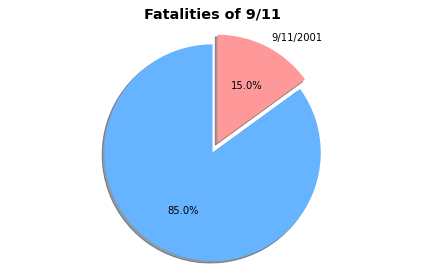

In [179]:
labels = ['', '9/11/2001']
sizes = [percent_rest, percent_911]

explode = (0, 0.1)
colors = ['#66b3ff','#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('Fatalities of 9/11', fontweight='bold', size='x-large')

plt.tight_layout()
plt.show()

In [180]:
cat_names = ['rank', 'classification', 'cause_of_death', 'nature_of_death', 'activity', 'emergency', 'duty', 'property_type', 'memorial_fund_info']
cont_names = ['age', 'incident_date', 'date_of_death']

print('Number of categorial columns: ', len(cat_names))
print('Number of continous columns: ', len(cont_names))

Number of categorial columns:  9
Number of continous columns:  3


## To summarize thus far:

The dataset started with 2,355 firefighter fatalities with 343 of those occuring from the 9/11 incident. These have been excluded from the data leaving us with 2012 fatalities, which is where the remaining analysis will focus. Within the remaining data we potentially have 9 useful categorial columns and 3 useful continous columns (we will assume the date is a contious relationship).

### Categorial columns

Here we can investigate the categories visually to attempt to get a visual insight to any fatality trends.

#### Rank

Doing a quick value counts shows over 287 "unique" ranks. Let's try to conslidate a few of these categories best we can by combining some ranks together.